# Импортирование модулей

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from  matplotlib.ticker import FuncFormatter

warnings.simplefilter(action="ignore", category=FutureWarning)

#import os
#print(os.listdir("../Kaggle-Olympic-History/"))

# 1. Импорт данных

Datasets are downloaded from [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results).

In [2]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

# Соединение двух датасетов (не понадобилось)

In [3]:
#df = pd.merge(data, regions, on='NOC', how='left')

# 2. Очистка данных

In [4]:
df = data

In [5]:
df.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [6]:
df = df.dropna(how = 'any', subset = ['Age', 'Height', 'Weight'])

#### Удаляем данные, в которых отсутствует возраст, рост и вес.

In [7]:
df.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


# 3. Описательная статистика

In [9]:
df.iloc[:,1:].describe(include = 'all')

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,206165,206165,206165.000000,206165.000000,206165.000000,206165,206165,206165,206165.000000,206165,206165,206165,206165,30181
unique,98546,2,NaN,NaN,NaN,660,226,51,NaN,2,42,56,590,3
top,Heikki Ilmari Savolainen,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Ice Hockey Men's Ice Hockey,Gold
freq,39,139454,NaN,NaN,NaN,13714,14214,13682,NaN,166706,13804,32374,3825,10167
mean,NaN,NaN,25.055509,175.371950,70.688337,NaN,NaN,NaN,1989.674678,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.483096,10.546088,14.340338,NaN,NaN,NaN,20.130865,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,11.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN


# 4. Визуальный анализ

## 1. Распределение участников по возрасту

In [10]:
#pd.set_option("display.max_rows", None)
df['Age'].value_counts()

23.0    17743
24.0    17536
22.0    16825
25.0    16298
21.0    15361
        ...  
69.0        2
70.0        2
64.0        2
71.0        1
68.0        1
Name: Age, Length: 61, dtype: int64

#### Самые распространенные возраста: 23, 24, 22.

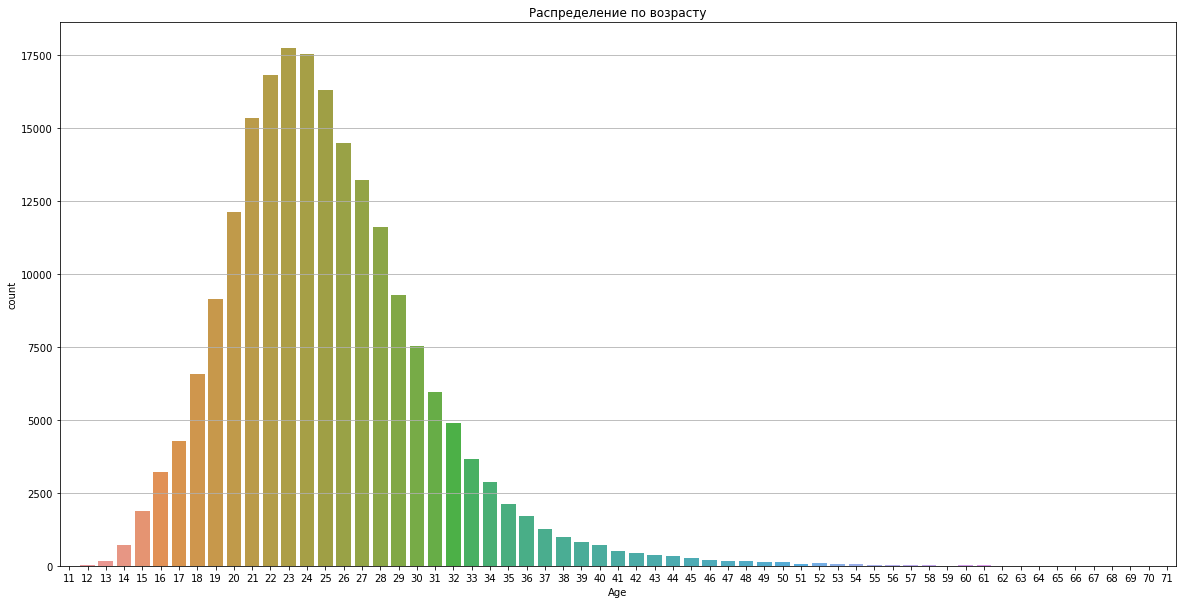

In [66]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.grid(True)
plt.title('Распределение по возрасту')
sns.countplot(data = df,
              x = 'Age')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x) + 11))

## 2. Количество медалей и распределение медалей по возрасту участников

In [12]:
medals = df.dropna(how = 'any', subset = ['Medal'])

In [13]:
medals['Medal'].value_counts()

Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64

#### Неравное количество медалей

Text(0.5, 1.0, 'Количество медалей')

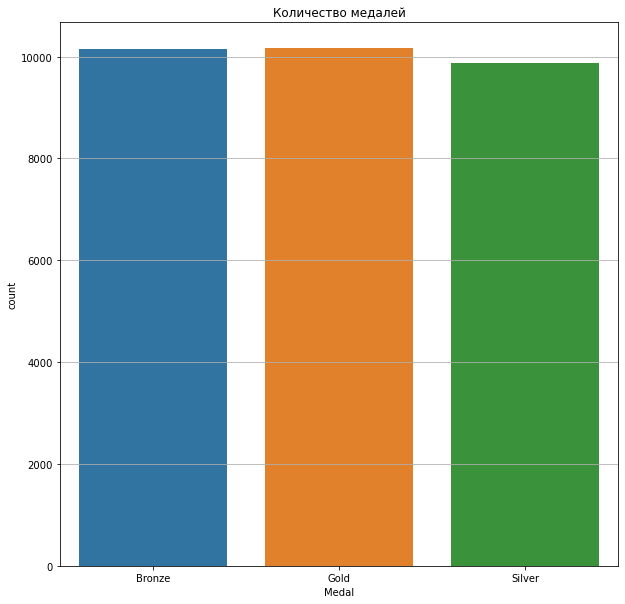

In [64]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.grid(True)
sns.countplot(data = medals,
              x = 'Medal')
plt.title('Количество медалей')

In [15]:
medals['Age'].value_counts()

23.0    2742
24.0    2649
25.0    2558
22.0    2549
26.0    2378
27.0    2213
21.0    2140
28.0    1948
29.0    1553
20.0    1550
30.0    1256
19.0    1025
31.0     950
32.0     760
18.0     644
33.0     558
34.0     453
17.0     399
35.0     295
16.0     284
36.0     241
37.0     160
15.0     155
38.0     122
39.0      94
40.0      90
41.0      58
42.0      55
14.0      53
46.0      41
44.0      37
43.0      33
45.0      26
52.0      18
49.0      15
47.0      15
48.0      14
13.0      10
50.0       9
54.0       5
56.0       5
51.0       5
58.0       3
55.0       3
60.0       3
61.0       2
53.0       2
59.0       1
66.0       1
57.0       1
Name: Age, dtype: int64

#### Больше всего медалей получили участники с возрастом: 23, 24, 25.

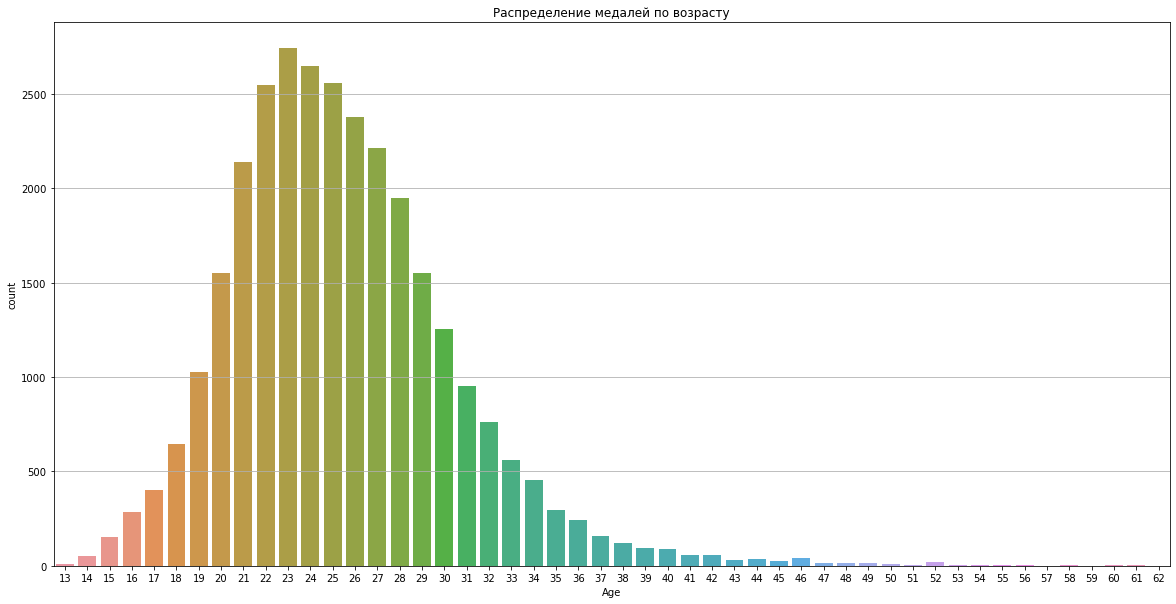

In [65]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.grid(True)
plt.title('Распределение медалей по возрасту')
sns.countplot(data = medals,
              x = 'Age')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x) + 13))

## 3. Распределение медалей по видам спорта по временам года

In [17]:
medals['Season'].value_counts()

Summer    25341
Winter     4840
Name: Season, dtype: int64

#### Большинство медалей были получены летом

In [18]:
medals_summer = medals[(medals['Season'] == 'Summer')]
medals_winter = medals[(medals['Season'] == 'Winter')]

Text(0.5, 1.0, 'Распределение медалей по летним видам спорта')

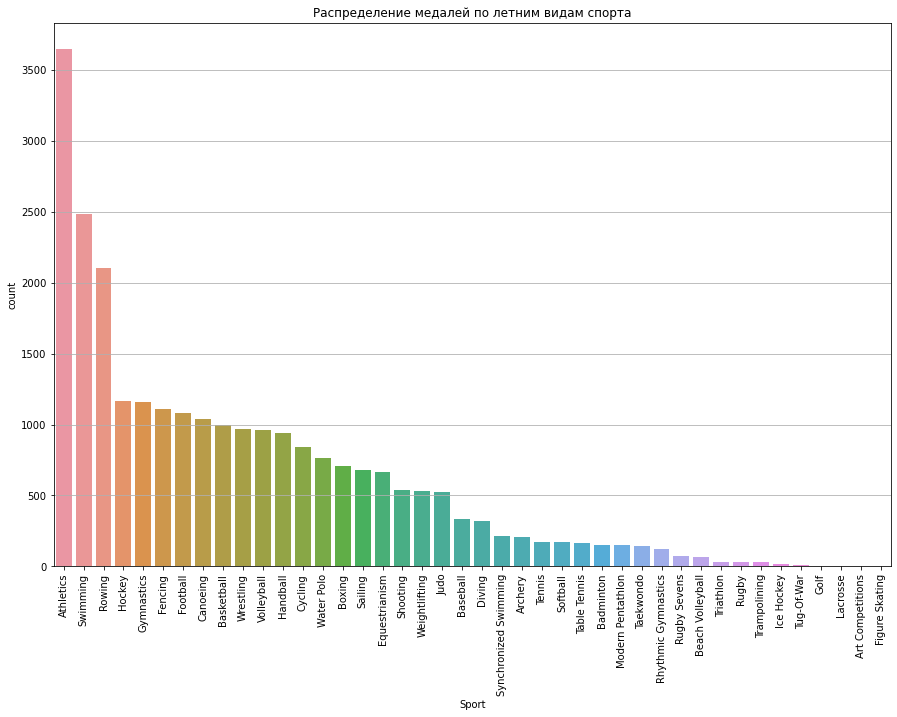

In [62]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation=90)
sns.countplot(data = medals_summer,
              x = 'Sport',
              order = medals_summer['Sport'].value_counts().index)
plt.title('Распределение медалей по летним видам спорта')

#### Олимпийские летние виды спорта в которых было получено больше всего медалей: легкая атлетика, плавание, гребля.

Text(0.5, 1.0, 'Распределение медалей по зимним видам спорта')

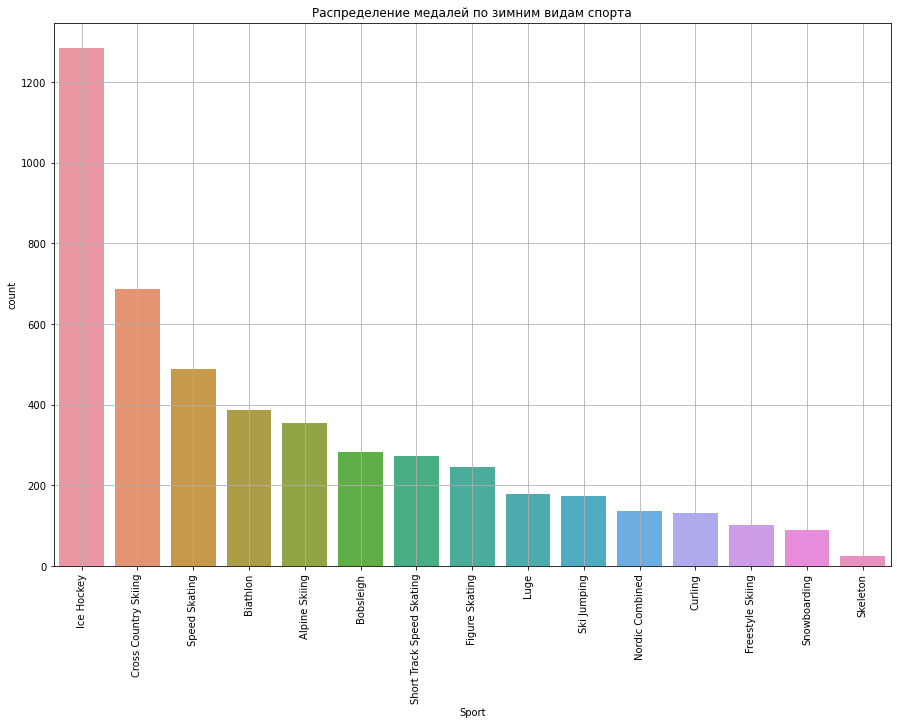

In [63]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = medals_winter,
              x = 'Sport',
              order = medals_winter['Sport'].value_counts().index)
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Распределение медалей по зимним видам спорта')

#### Олимпийские зимние виды спорта в которых было получено больше всего медалей: хоккей, беговые лыжи, конькобежный спорт.

## 3. Распределение участников по годам

In [21]:
df['Year'].value_counts()

2000    13682
1988    13636
2016    13443
2008    13402
2004    13399
1992    13109
2012    12524
1996    11838
1972    11482
1984    10868
1968    10203
1976     9567
1964     8711
1980     8217
1960     8038
2014     4673
2010     4378
2006     4365
2002     4060
1998     3518
1994     2971
1956     2595
1952     2058
1948     1016
1936      896
1928      666
1924      582
1912      551
1932      492
1920      428
1908      366
1906      201
1904      119
1900       71
1896       40
Name: Year, dtype: int64

Text(0.5, 1.0, 'Распределение участников по годам')

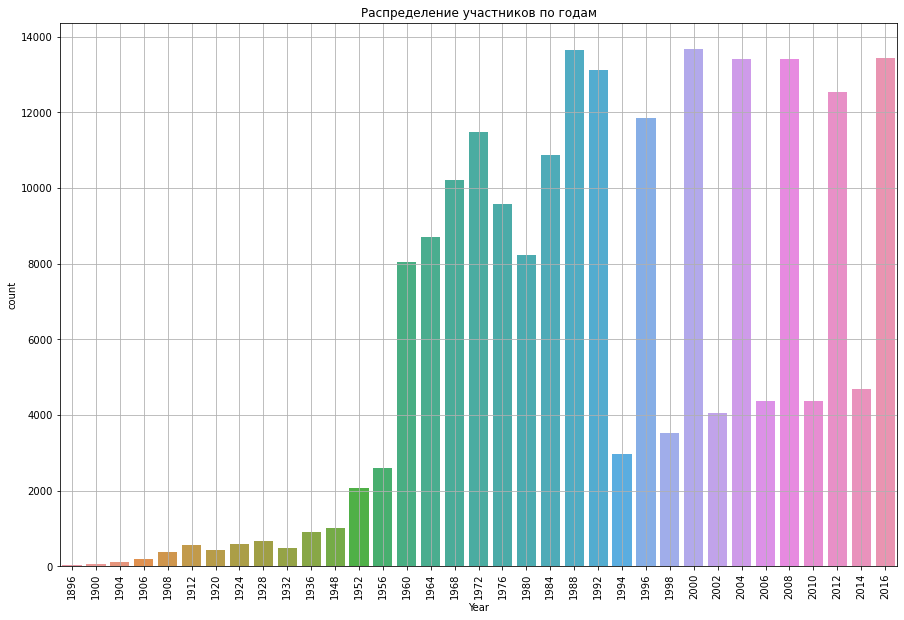

In [57]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = df,
              x = 'Year')
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Распределение участников по годам')

#### Больше всего участников участвовало в Олимпиаде в 2000-м, 1988-м и 2016-м году.

In [22]:
summer = df[(df['Season'] == 'Summer')]
winter = df[(df['Season'] == 'Winter')]

In [58]:
summer['Year'].value_counts()

2000    13682
2016    13443
2008    13402
2004    13399
2012    12524
1996    11838
1988    11618
1992    10326
1972     9847
1984     8917
1968     8402
1976     8265
1960     7526
1964     7368
1980     6843
1956     2261
1952     1914
1948      914
1936      827
1928      622
1912      551
1924      543
1932      449
1920      428
1908      366
1906      201
1904      119
1900       71
1896       40
Name: Year, dtype: int64

Text(0.5, 1.0, 'Распределение участников Летней Олимпиады по годам')

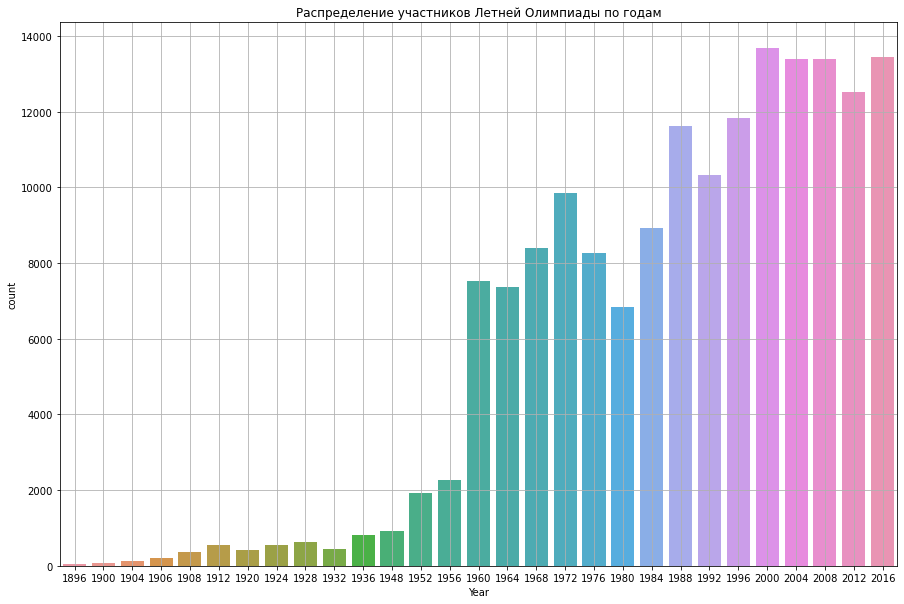

In [60]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = summer,
              x = 'Year')
plt.grid(True)
#plt.xticks(rotation = 90)
plt.title('Распределение участников Летней Олимпиады по годам')

#### Больше всего участников участвовало в Летней Олимпиаде в 2000-м, 2016-м и 2008-м году.

In [55]:
winter['Year'].value_counts()

2014    4673
2010    4378
2006    4365
2002    4060
1998    3518
1994    2971
1992    2783
1988    2018
1984    1951
1968    1801
1972    1635
1980    1374
1964    1343
1976    1302
1960     512
1956     334
1952     144
1948     102
1936      69
1928      44
1932      43
1924      39
Name: Year, dtype: int64

Text(0.5, 1.0, 'Распределение участников Зимней Олимпиады по годам')

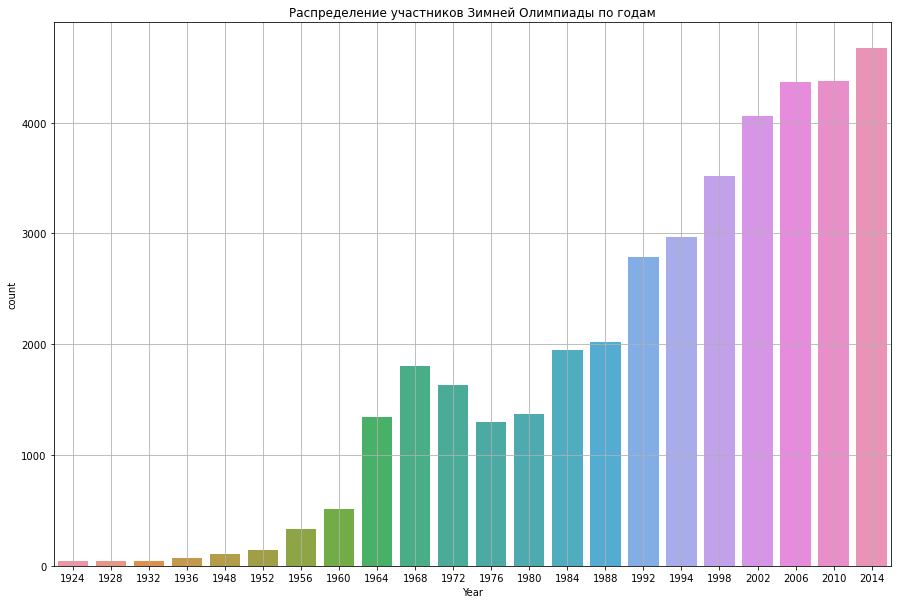

In [61]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = winter,
              x = 'Year')
plt.grid(True)
#plt.xticks(rotation = 90)
plt.title('Распределение участников Зимней Олимпиады по годам')

#### Больше всего участников участвовало в Зимней Олимпиаде в 2014-м, 2010-м и 2006-м году.

## 5. Распределение спортсменов по командам (топ-30)

In [25]:
top_30_teams = df['Team'].value_counts().head(30).index.tolist()

In [26]:
df_teams = df.loc[df['Team'].isin(top_30_teams)]

In [27]:
df_teams['Team'].value_counts()

United States     13714
France             7807
Canada             7668
Great Britain      7499
Italy              7433
Japan              7339
Germany            6997
Australia          6509
Poland             5667
Sweden             5251
Soviet Union       4757
China              4712
Hungary            4665
Russia             4614
Finland            4365
Spain              4281
Switzerland        3918
South Korea        3751
Netherlands        3684
Romania            3421
West Germany       3159
Brazil             3129
Bulgaria           3015
Norway             3014
Austria            2984
Czechoslovakia     2685
East Germany       2511
Ukraine            2380
Mexico             2291
Cuba               2201
Name: Team, dtype: int64

Text(0.5, 1.0, 'Распределение спортсменов по командам (топ-30)')

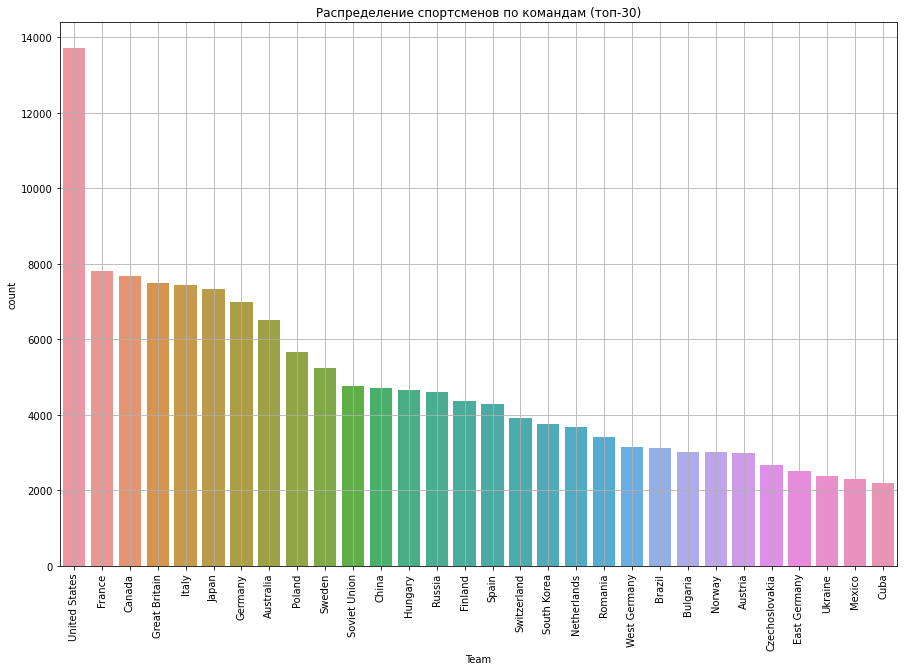

In [56]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = df_teams,
              x = 'Team',
              order = df_teams['Team'].value_counts().index)
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Распределение спортсменов по командам (топ-30)')

#### Больше всего участников Олимпиад были из: США, Франции и Канады.

# 5. Гипотезы

## 1. Чем выше атлет, тем выше его шанс получить медаль в баскетболе

In [29]:
basketball = df[df['Sport'] == "Basketball"]


basketball['Medal'] = basketball['Medal'].replace(['Gold', 'Silver', 'Bronze'], 'Yes')
basketball['Medal'].fillna('No', inplace = True)

/var/folders/_1/qd1mt3zn08vcxbqywqq_sf7w0000gn/T/ipykernel_85721/315894922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketball['Medal'] = basketball['Medal'].replace(['Gold', 'Silver', 'Bronze'], 'Yes')
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
basketball['Medal'].value_counts()

No     2668
Yes    1000
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Плотность распределения количества медалистов и не-медалистов в процентах')

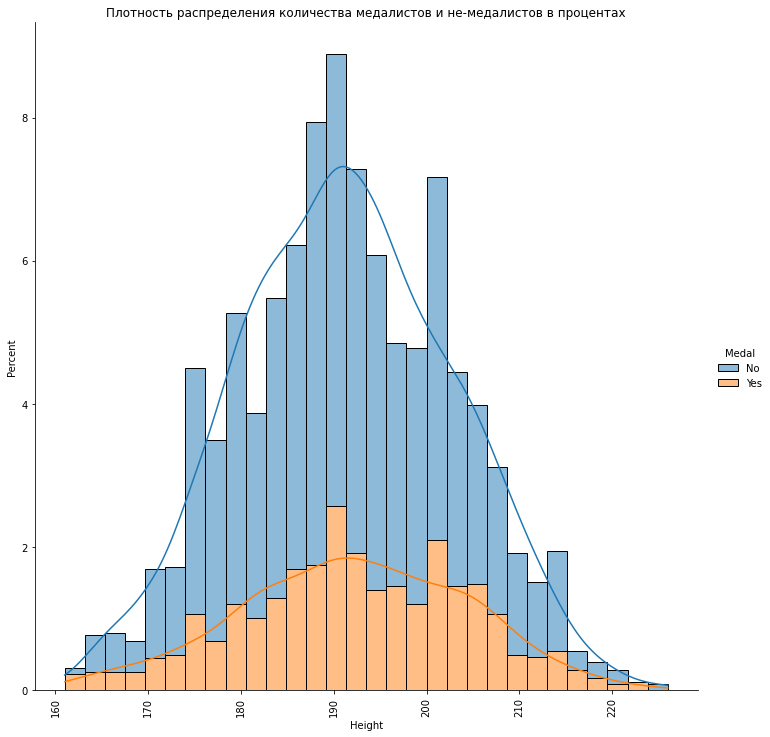

In [68]:
sns.displot(data = basketball,
            x = 'Height',
            height=10,
            hue="Medal",
            kde=True,
            stat='percent',
            multiple="stack")
#plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Плотность распределения количества медалистов и не-медалистов в процентах')

<AxesSubplot:xlabel='Height', ylabel='Age'>

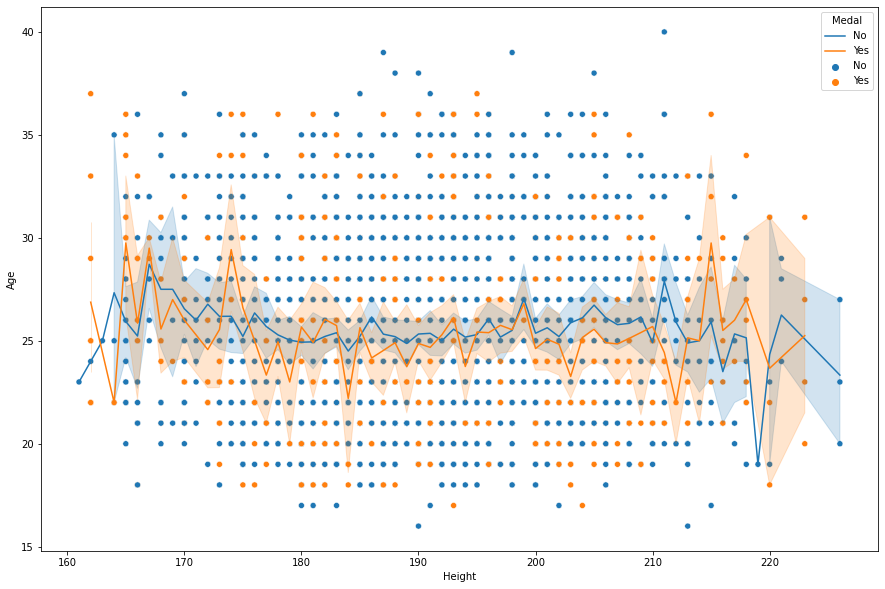

In [69]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.scatterplot(data = basketball,
                x = 'Height',
                y = 'Age',
                hue = 'Medal')
sns.lineplot(data = basketball,
             x = 'Height',
             y = 'Age',
            hue = 'Medal')

На диаграмме распределения видно, что плотность респределения у не-медалистов такая же, как и плотность распределения медалистов. Как справа, так и слева от средней точки отклонения. \
На диаграмме рассеивания также видно что рост и возраст у медалистов и не-медалистов примерно одинаков.
Соответственно разница в росте никак не связана с получением медали. \
Результат: гипотеза неверна.

## 2. В Летней Олимпиаде участвовало больше спортсменов

Text(0.5, 1.0, 'Количество участников в Олимпиаде летом и зимой')

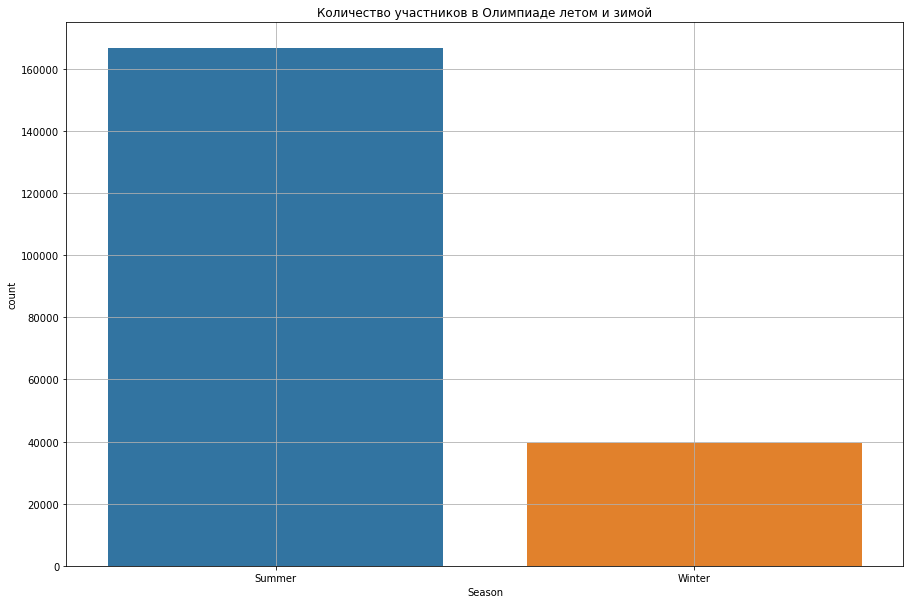

In [73]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = df,
            x = 'Season')
plt.grid(True)
plt.title('Количество участников в Олимпиаде летом и зимой')

Text(0.5, 1.0, 'Количество участников в Олимпиаде летом и зимой по годам')

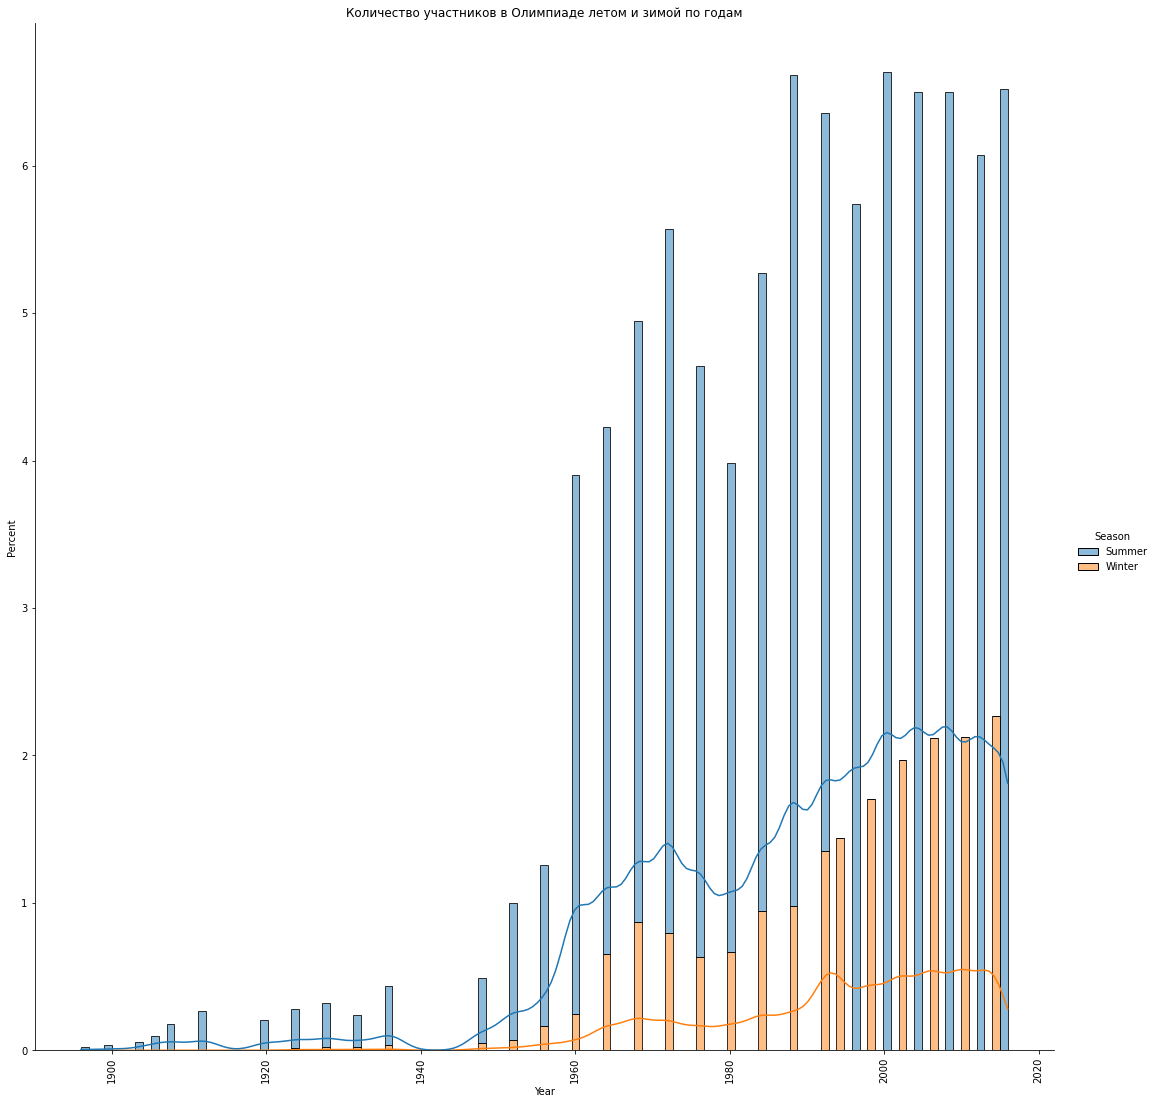

In [74]:
sns.displot(data = df,
            x = 'Year',
            hue='Season',
            height=15,
            kde=True,
            stat='percent',
            multiple="stack")
plt.xticks(rotation = 90)
plt.title('Количество участников в Олимпиаде летом и зимой по годам')

### Видно, что даже до разделения Олимпиады на летнюю и зимнюю на разные годы спортсменов на Летней Олимпиаде всегда было больше. 
### Результат: гипотеза верна.

## 3. Мужчины и женщины в среднем получают одинаковое количество медалей на Олимпийских играх.

In [35]:
df_ = df.copy()
df_['Medal'] = df_['Medal'].replace(['Gold', 'Silver', 'Bronze'], 'Yes')
df_['Medal'].fillna('No', inplace = True)

In [36]:
df_['Medal'].value_counts()

No     175984
Yes     30181
Name: Medal, dtype: int64

In [37]:
male = df_[df_['Sex'] == 'M']
female = df_[df_['Sex'] == 'F']

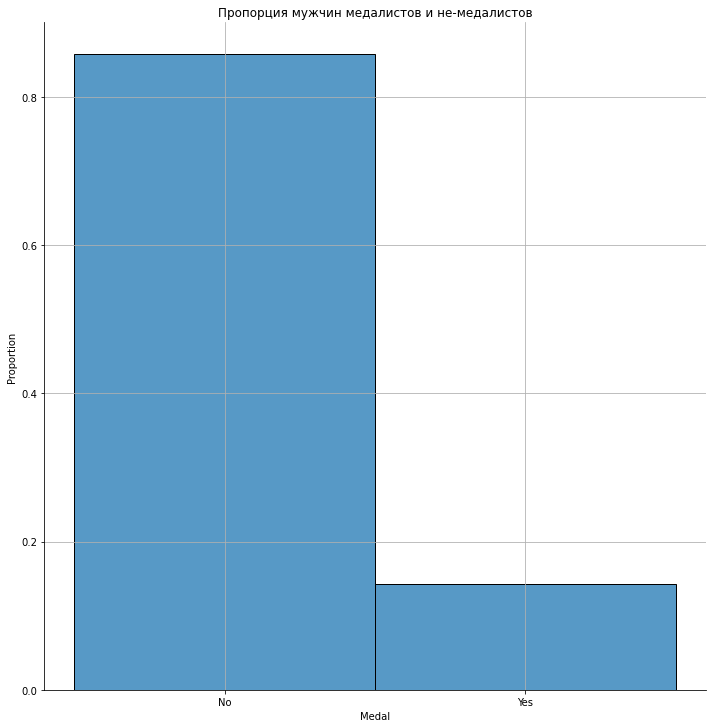

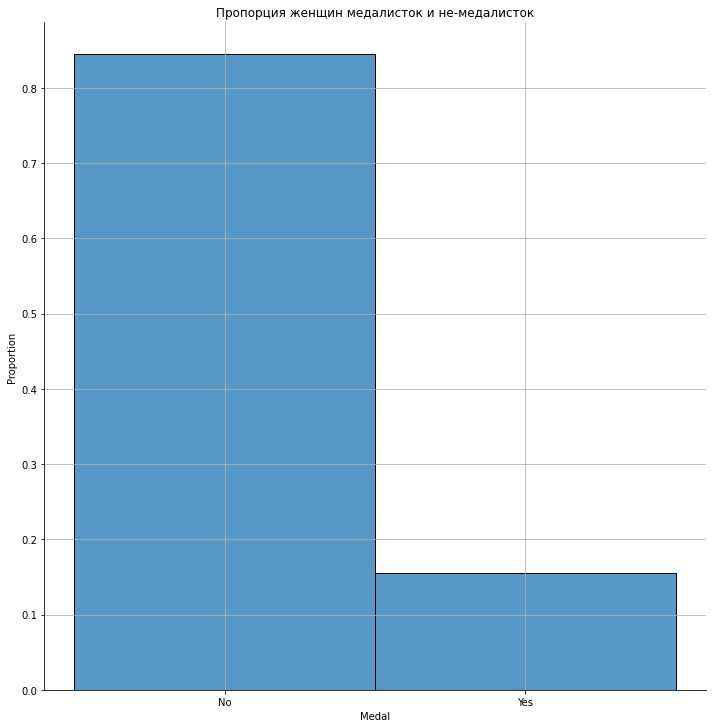

In [78]:
sns.displot(data = male,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Пропорция мужчин медалистов и не-медалистов')

sns.displot(data = female,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Пропорция женщин медалисток и не-медалисток')

plt.show()

In [79]:
print('Процент мужчин медалистов:', len(male[male['Medal'] == 'Yes'].value_counts().index)/len(male)*100, '%')
print('Процент женщин медалистов:', len(female[female['Medal'] == 'Yes'].value_counts().index)/len(female)*100, '%')

Процент мужчин медалистов: 14.220459793193454 %
Процент женщин медалистов: 15.514682735980573 %


In [40]:
male_ = df[df['Sex'] == 'M']
female_ = df[df['Sex'] == 'F']

In [41]:
male_['Medal'].fillna('No', inplace = True)
female_['Medal'].fillna('No', inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


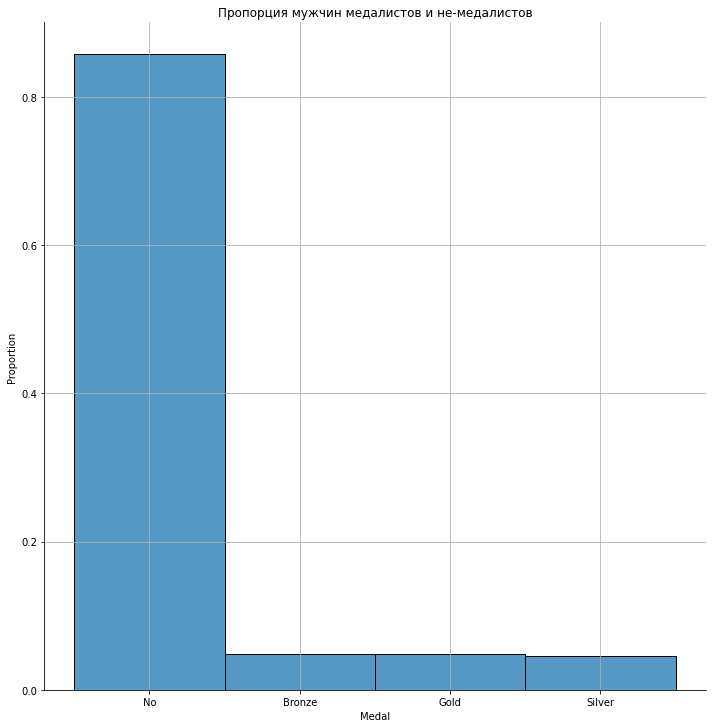

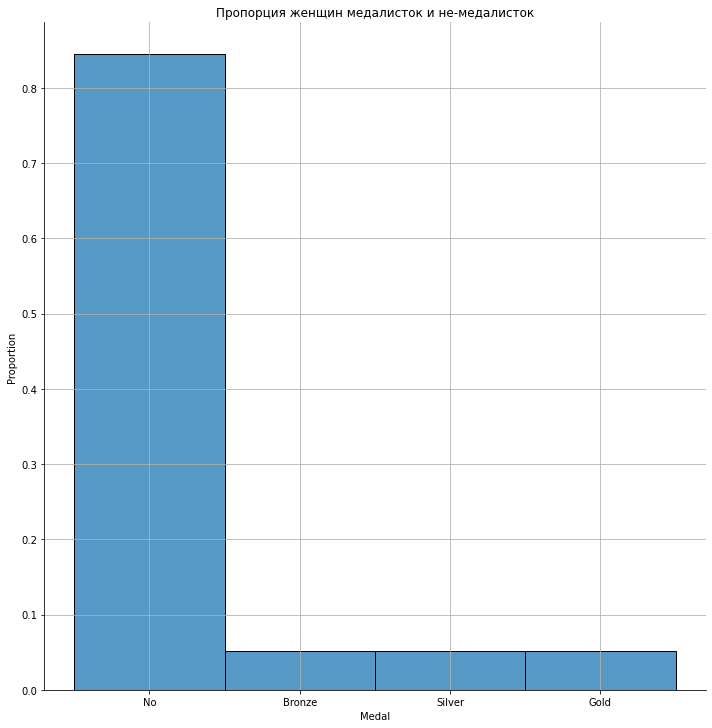

In [80]:
sns.displot(data = male_,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Пропорция мужчин медалистов и не-медалистов')

sns.displot(data = female_,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Пропорция женщин медалисток и не-медалисток')

plt.show()

In [81]:
m_g = len(male_[male_['Medal'] == 'Gold'].value_counts().index)/len(male_)*100
m_s = len(male_[male_['Medal'] == 'Silver'].value_counts().index)/len(male_)*100
m_b = len(male_[male_['Medal'] == 'Bronze'].value_counts().index)/len(male_)*100
f_g = len(female_[female_['Medal'] == 'Gold'].value_counts().index)/len(female_)*100
f_s = len(female_[female_['Medal'] == 'Silver'].value_counts().index)/len(female_)*100
f_b = len(female_[female_['Medal'] == 'Bronze'].value_counts().index)/len(female_)*100

print('Процент золотых медалистов среди мужчин:', m_g, '%')
print('Процент серебряных медалистов среди мужчин:', m_s, '%')
print('Процент бронзовых медалистов среди мужчин:', m_b, '%\n')

print('Процент золотых медалисток среди женщин:', f_g, '%')
print('Процент серебряных медалисток среди женщин:', f_s, '%')
print('Процент бронзовых медалисток среди женщин:', f_b, '%\n')

print('Процент всех медалистов среди мужчин:', m_g + m_s + m_b, '%')
print('Процент всех медалисток среди женщин:', f_g + f_s + f_b, '%')
print('Разница в процентах между мужчинами-медалистами и женщинами-медалистками:', (f_g + f_s + f_b)-(m_g + m_s + m_b), '%' )

Процент золотых медалистов среди мужчин: 4.825964117199937 %
Процент серебряных медалистов среди мужчин: 4.609405251911024 %
Процент бронзовых медалистов среди мужчин: 4.785090424082493 %

Процент золотых медалисток среди женщин: 5.152073870875867 %
Процент серебряных медалисток среди женщин: 5.1535728740387645 %
Процент бронзовых медалисток среди женщин: 5.209035991065941 %

Процент всех медалистов среди мужчин: 14.220459793193456 %
Процент всех медалисток среди женщин: 15.514682735980575 %
Разница в процентах между мужчинами-медалистами и женщинами-медалистками: 1.294222942787119 %


### Женщины получают немного больше медалей в процентном соотношении, чем мужчины, разница составляет 1,3%. 
### Результат: гипотеза неверна.